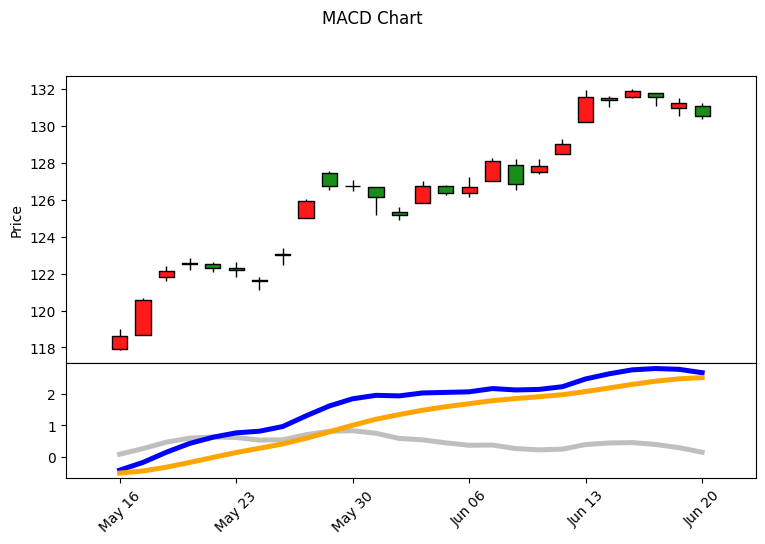

In [15]:
import mplfinance as mpf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    # 計算短期（12日）和長期（26日）移動平均線
    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()

    # 計算DIF（快速線）和DEA（慢速線）
    data['dif'] = short_ema - long_ema
    data['dea'] = data['dif'].ewm(span=signal_period, adjust=False).mean()

    # 計算MACD柱狀圖（MACD Histogram）
    data['macd_hist'] = data['dif']  - data['dea']

    return data

file_path = 'F:/python/pystock/data/original'
stock_0050_data = pd.read_csv(f'{file_path}/0050.TW.csv',parse_dates=['Date'],index_col=0).dropna()

stock_0050_data = calculate_macd(stock_0050_data)

date_str = '2023-06-15'
input_date = datetime.strptime(date_str, '%Y-%m-%d')

# 計算 start_date 和 end_date
start_date = input_date - timedelta(days=30)
end_date = input_date + timedelta(days=5)

# 設定日期區間
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')
df = stock_0050_data.loc[start_date_str:end_date_str]
df.reset_index() ;
df = df[['Open','High','Low','Close','Adj Close','Volume','dif','dea','macd_hist' ]]
df

# 設置mplfinance的股票圖表樣式
mc = mpf.make_marketcolors(up='r', down='g')
s = mpf.make_mpf_style(marketcolors=mc)

# 繪製MACD圖表
mpf.plot(df, type='candle', style=s, title='MACD Chart', ylabel='Price',
          volume=False, figratio=(10, 6),
         addplot=[
             mpf.make_addplot(df['macd_hist'], panel=1, color='gray', alpha=0.5),
             mpf.make_addplot(df['dif'], panel=1, color='blue', secondary_y=False),
             mpf.make_addplot(df['dea'], panel=1, color='orange', secondary_y=False)
         ])

F:\Python39\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


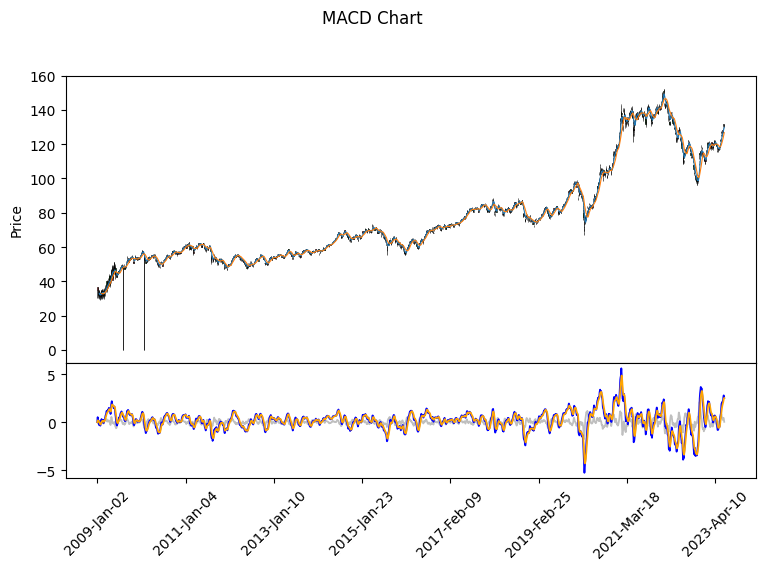

In [4]:
stock_0050_data = calculate_macd(stock_0050_data)

date_str = '2023-06-15'
input_date = datetime.strptime(date_str, '%Y-%m-%d')

# 計算 start_date 和 end_date
start_date = input_date - timedelta(days=30)
end_date = input_date + timedelta(days=5)

# 設定日期區間
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')
df = stock_0050_data.loc[start_date_str:end_date_str]



# 設置mplfinance的股票圖表樣式
mc = mpf.make_marketcolors(up='r', down='g')
s = mpf.make_mpf_style(marketcolors=mc)

# 繪製MACD圖表
mpf.plot(stock_0050_data, type='candle', style=s, title='MACD Chart', ylabel='Price',
         mav=(12, 26), volume=False, figratio=(10, 6),
         addplot=[
             mpf.make_addplot(stock_0050_data['macd_hist'], panel=1, color='gray', alpha=0.5),
             mpf.make_addplot(stock_0050_data['dif'], panel=1, color='blue', secondary_y=False),
             mpf.make_addplot(stock_0050_data['dea'], panel=1, color='orange', secondary_y=False)
         ])